# Descriptive Statistics

Descriptive statistics is a way for us to summarize the data that we have obtained

It does this in several ways
<li>
    <ul>1. Data summary</ul>
    <ul>2. Central tendency</ul>
    <ul>3. Measures of variability</ul>
</li>

In [1]:
%matplotlib inline
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import random

plt.style.use('classic')

In [2]:
# Code to initialize slider and show it
slider = widgets.IntSlider(value=10,
                              min=0,
                              max=100,
                              step=1,
                              description='Data amount:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal'
                              )

def raw(number):
    return number

widgets.interact(raw, number=slider);


interactive(children=(IntSlider(value=10, continuous_update=False, description='Data amount:'), Output()), _do…

<h2>Below shows the various representation of data</h2> <br>
<li style = "list-style : square;">
    <ol>Bar chart</ol>
    <ol>Scatter plot</ol>
    <ol>Line chart</ol>
</li>
The data is randomly generated from zero to fifty 

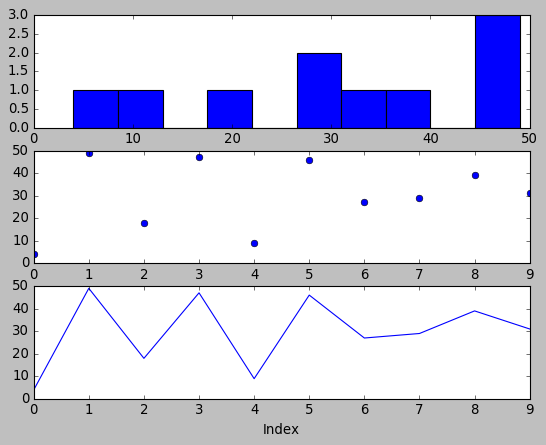

In [3]:
data = []
def initializeData(amount):
    for i in range(amount):
        data.append(random.randint(0,50))

data.sort()
fig = plt.figure(1); plt.clf()
initializeData(slider.value)

ax = fig.add_subplot(311)
ax.hist(data)

ax1 = fig.add_subplot(312)
ax1.plot(range(len(data)), data,'o')

ax2 = fig.add_subplot(313)
ax2.plot(range(len(data)), data,'-')
plt.xlabel('Index')
plt.show()

In [ ]:
inputData = 0
inputtedData = []
plt.ion()
while(isinstance(inputData,int)):
    try:
        inputData = int(input("Enter a number :"))
        inputtedData.append(inputData)
        
        mean = np.mean(inputtedData)
        standardD = np.std(inputtedData)
        plt.plot(range(len(inputtedData)),inputtedData,'o')
        plt.plot([0,len(inputtedData)],[mean,mean])
        plt.plot([0,len(inputtedData)],[mean + standardD, mean + standardD],'r')
        plt.plot([0,len(inputtedData)],[mean - standardD, mean - standardD],'r')
        plt.draw()
        plt.pause(0.001)
        plt.clf()
    except:
        break
plt.cla()
plt.clf()


In [5]:
normalDistSampleAmount = widgets.IntSlider(value=1,
                              min=0,
                              max=5000,
                              step=1,
                              description='Data amount:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal'
                              )

widgets.interact(raw, number=normalDistSampleAmount);

interactive(children=(IntSlider(value=1, continuous_update=False, description='Data amount:', max=5000), Outpu…

The cell below will create 'x' amounts of data (based on the slider) with a mean of 0 and standard deviation of one. <br>
It will then create a histogram based on that data

In [6]:
from scipy import stats

X = stats.norm(loc=0, scale = 1)
samples = X.rvs(normalDistSampleAmount.value)

It will then create a line to show the normal distribution of the graph.

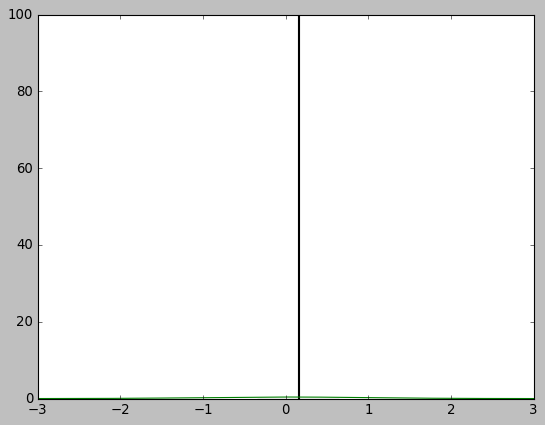

In [7]:
plt.clf()
plt.hist(samples,density = True, bins = 100)
plt.plot(np.linspace(-3,3,1000), X.pdf(np.linspace(-3,3,1000)))
plt.show()

# Inferential Statistics

Inferential Statistics takes a small data set that is a part of a much larger data set to draw conclusions about the much larger data set

In [8]:
amountSlider = widgets.IntSlider(value=50,
                              min=0,
                              max=100,
                              step=1,
                              description='Data amount:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal'
                              )

sampleSizeSlider = widgets.IntSlider(value=50,
                              min=1,
                              max=500,
                              step=1,
                              description='Sample size :',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal'
                              )
widgets.interact(raw, number=amountSlider)
widgets.interact(raw, number=sampleSizeSlider)

interactive(children=(IntSlider(value=50, continuous_update=False, description='Data amount:'), Output()), _do…

interactive(children=(IntSlider(value=50, continuous_update=False, description='Sample size :', max=500, min=1…

<function __main__.raw(number)>

With a large data set, we can use inferential statistics by taking a smaller sample size and applying what we find from that smaller sample size to the whole data set. In this example, I am trying to figure out what is the ratio of female participants to male participants. The results of the inferential statistics can be found below.

50


Text(0.5, 0, 'Ratio of Females to Males')

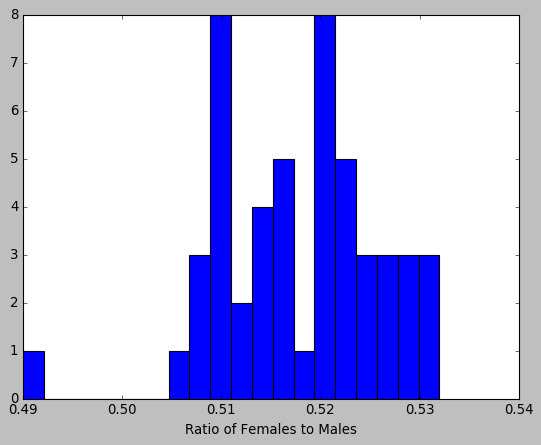

In [9]:
import scipy.stats as stats
import math
import random

weightDataM = []
weightDataF = []
weightData = []
weightDataTemp = []
female_percent = 0
female_percent_list = []
with open('data.csv') as fp:
  lines = fp.readlines()
  for i in lines:
    line = i.split(',')
    weightData.append([line[0], int(line[1])])
#     if(line[0] == 'Male'):
#       heightDataM.append(int(line[1]))
#     else:
#         heightDataF.append(int(line[1]))
for i in range(amountSlider.value):
    weightDataTemp = weightData * 1
    
    for i in range(sampleSizeSlider.value):
        single_data = weightDataTemp.pop(random.randrange(0, len(weightDataTemp)))
        if(single_data[0] == 'Male'):
            weightDataM.append(single_data[0])
        else:
            weightDataF.append(single_data[0])

    female_percent_list.append((len(weightDataF)/(len(weightDataM) + len(weightDataF))))
    
    
print(len(female_percent_list))
plt.hist(female_percent_list, bins=20)
plt.xlabel('Ratio of Females to Males')

above is the test for the margin of error to see if drawing a conclusion about that particular data set is true or not, the true value for the ratio of Females to Males is 0.51. In the test above sample sizes were taken from the total of 500 and when each of the samples were taken, the value of the ratio is calculated. We can see that the value of the ratio is/near 0.51 and never goes past a certain threshold. Therefore assumptions can be made with that data set.